In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
%matplotlib inline

In [2]:
path = '/Users/wei/Python/MPHDissertation/test_file/19 ratified countries_21 March 23.xlsx'

In [3]:
df = pd.read_excel(path)

In [6]:
#df.head()

# 1. Visualize the Time Series

# 1a. CVD Mortality in Males

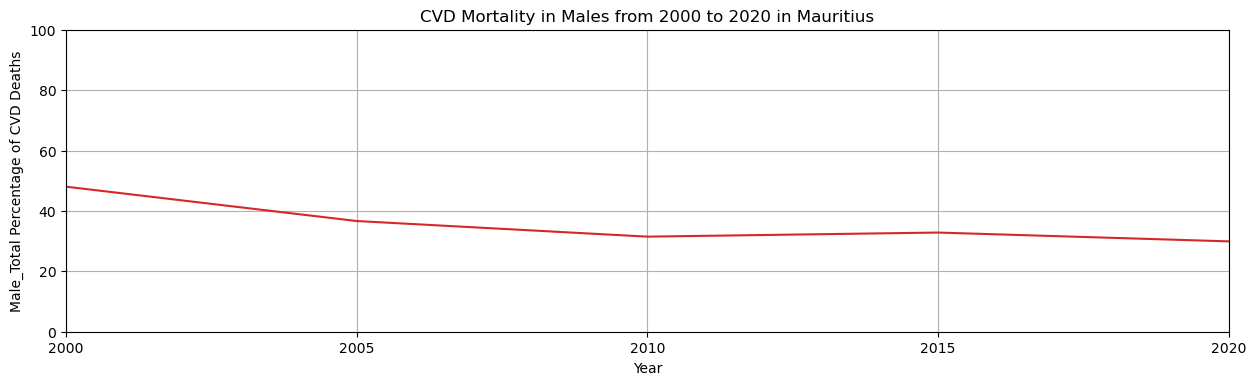

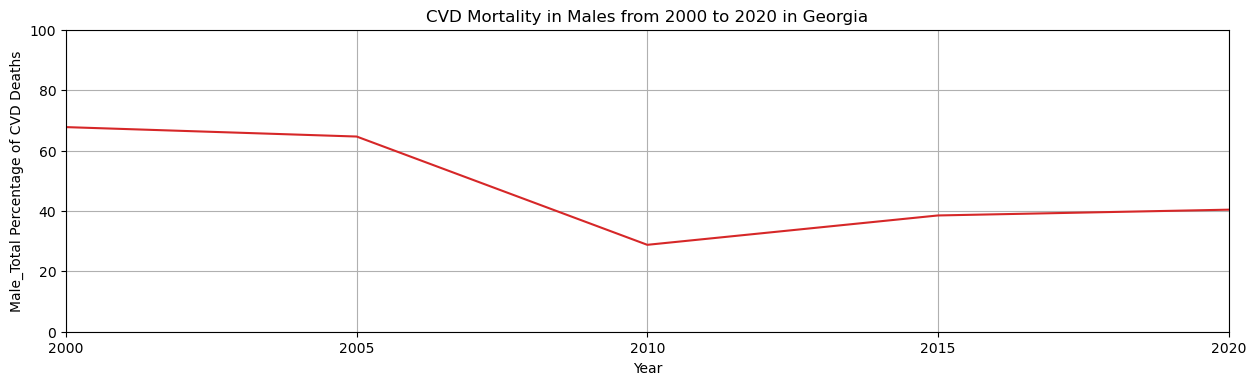

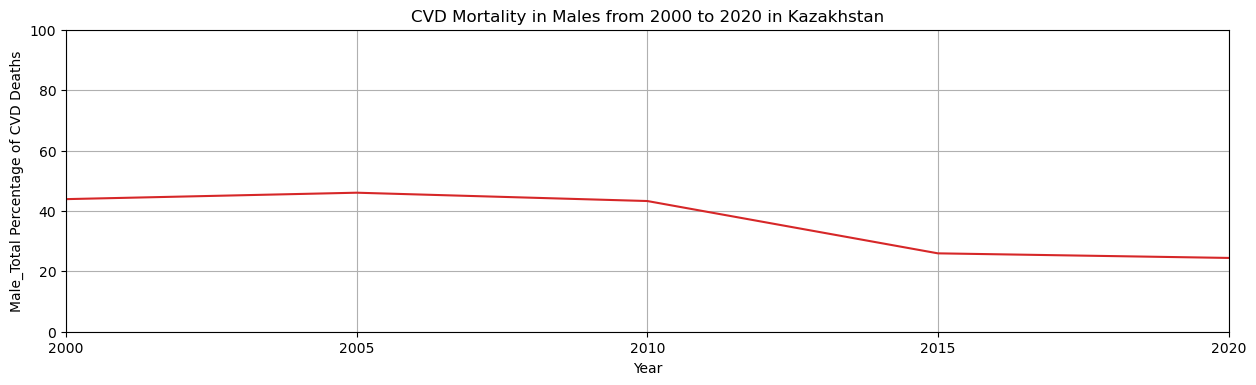

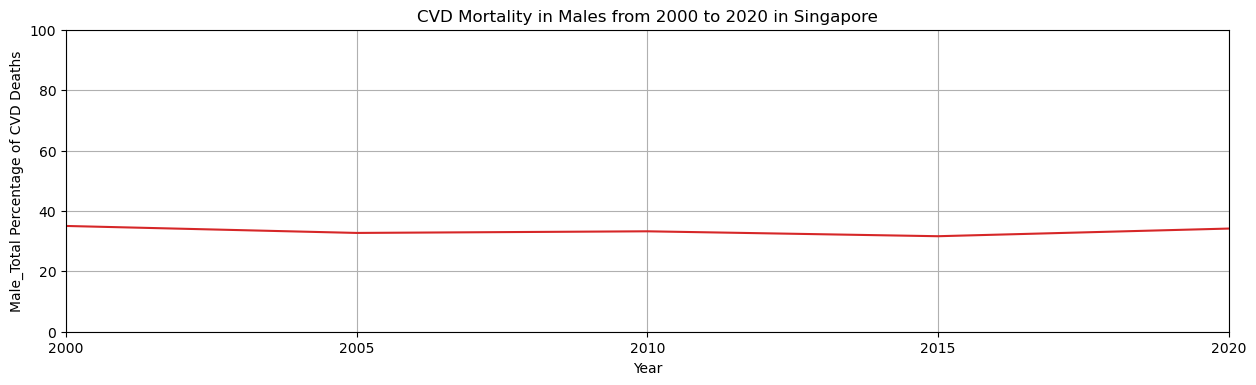

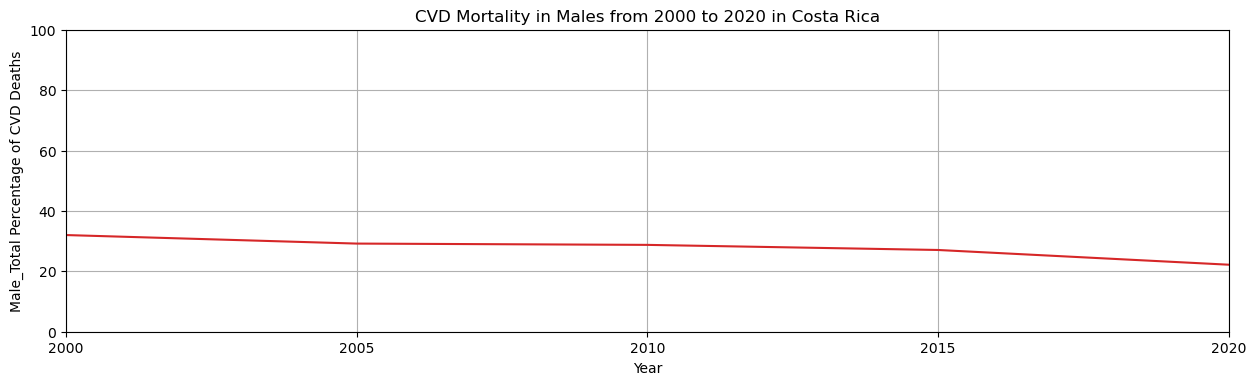

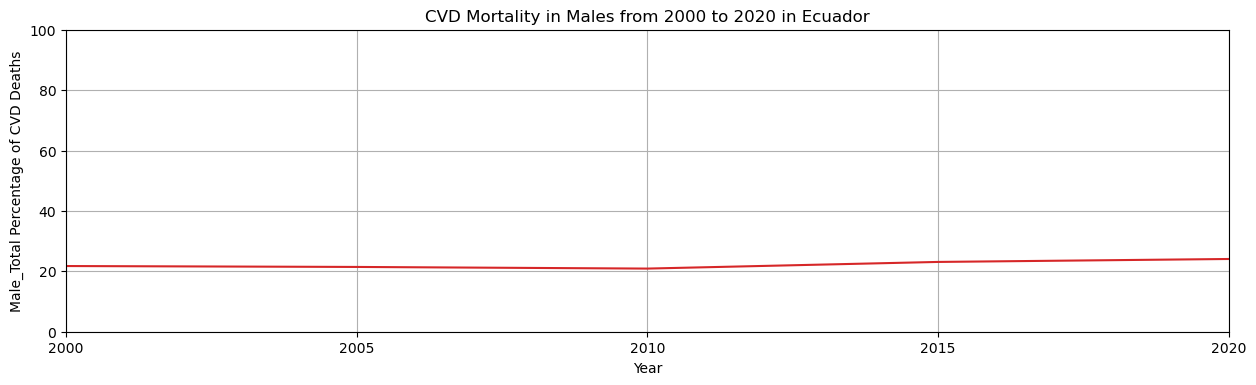

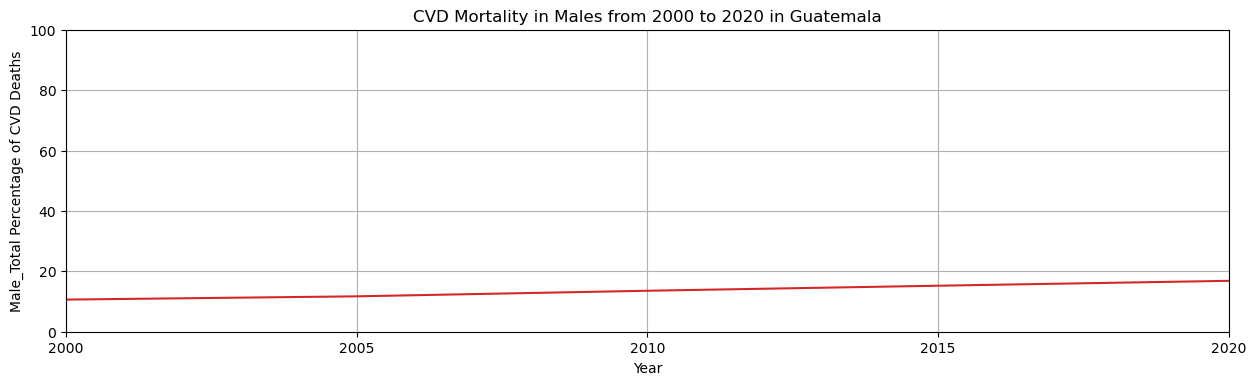

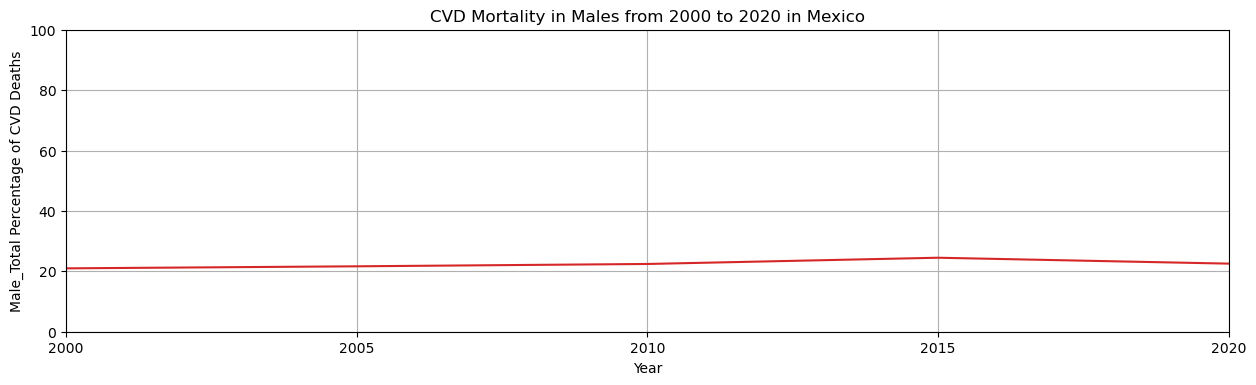

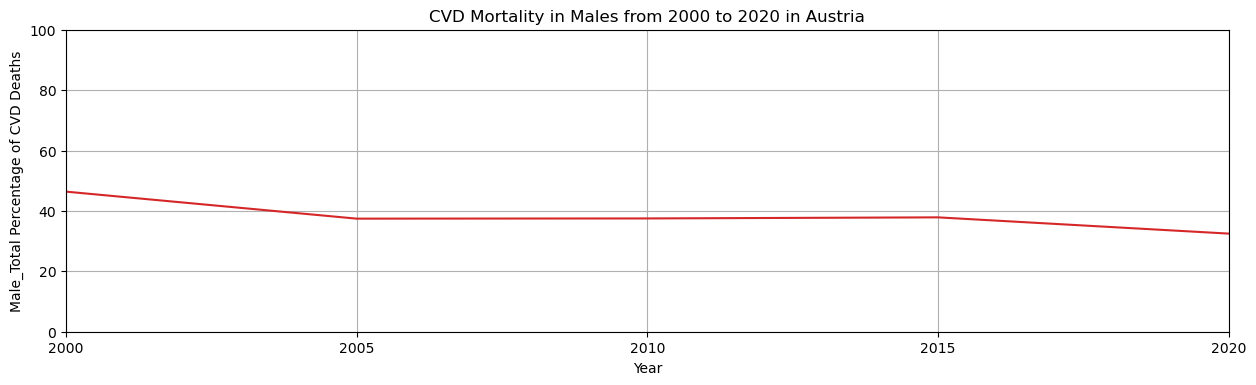

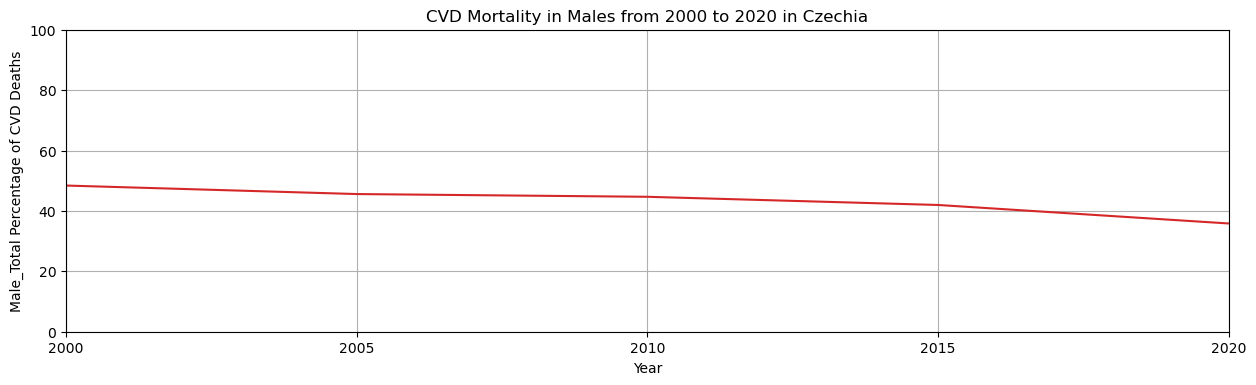

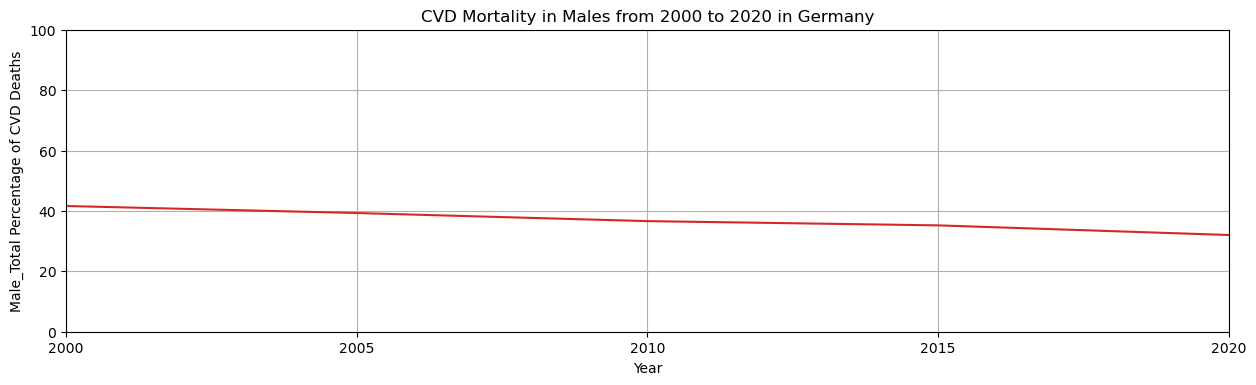

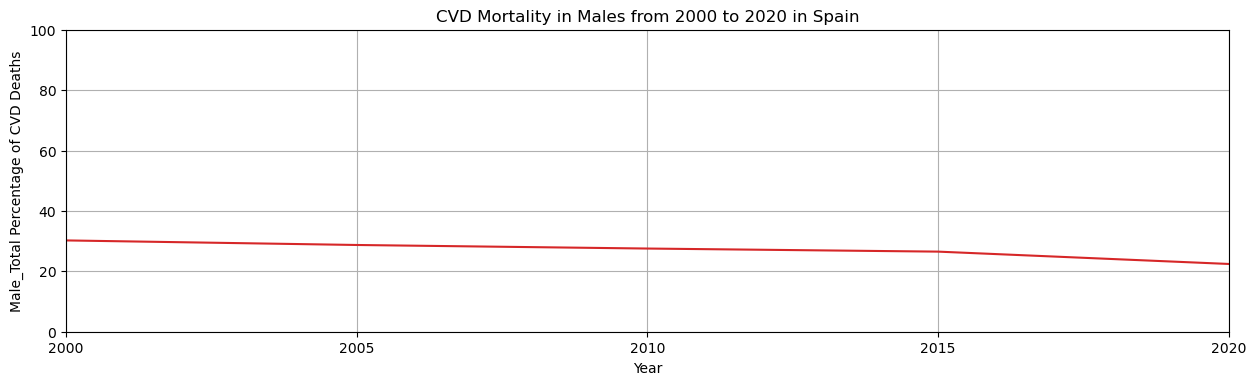

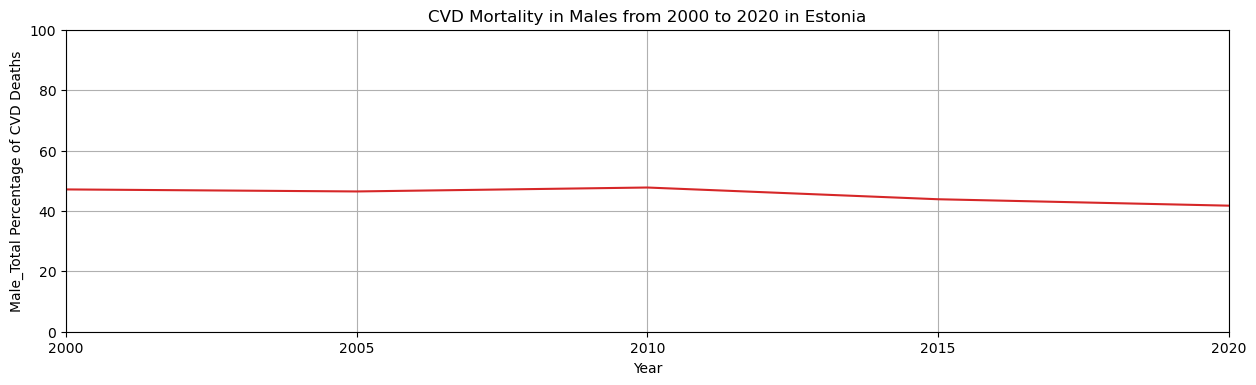

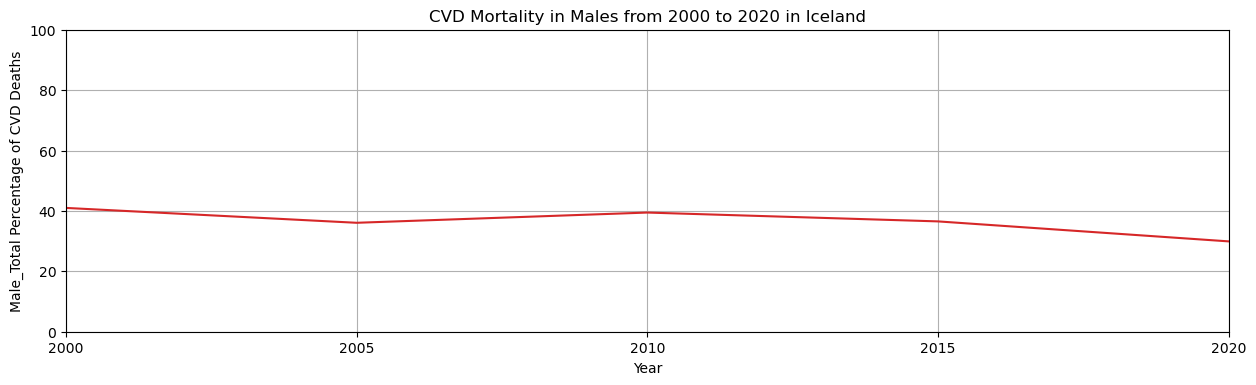

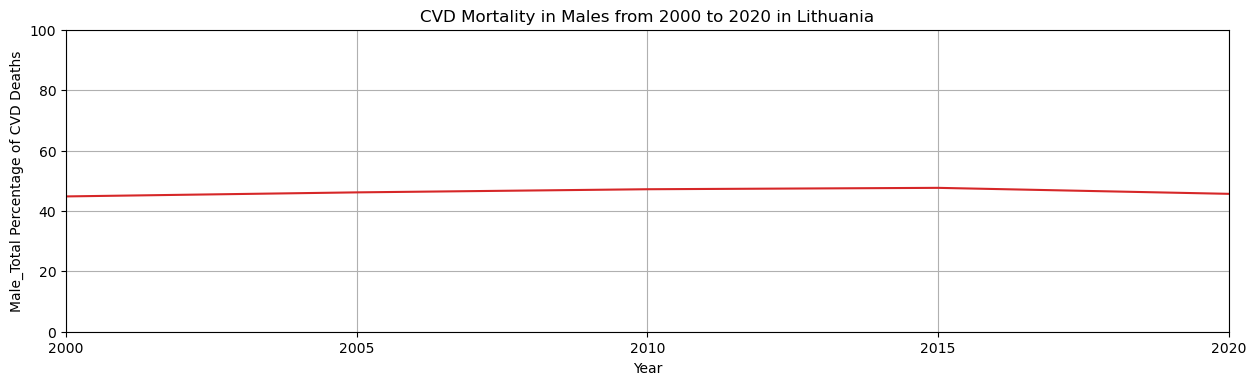

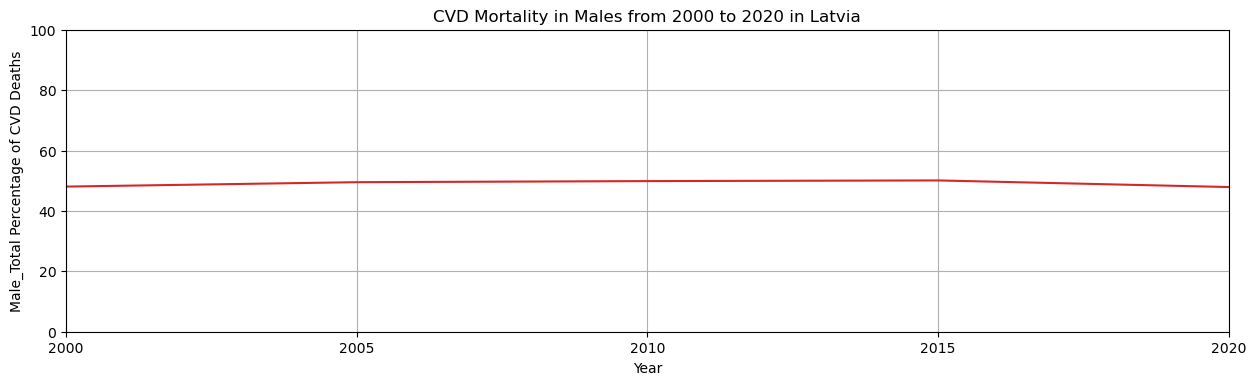

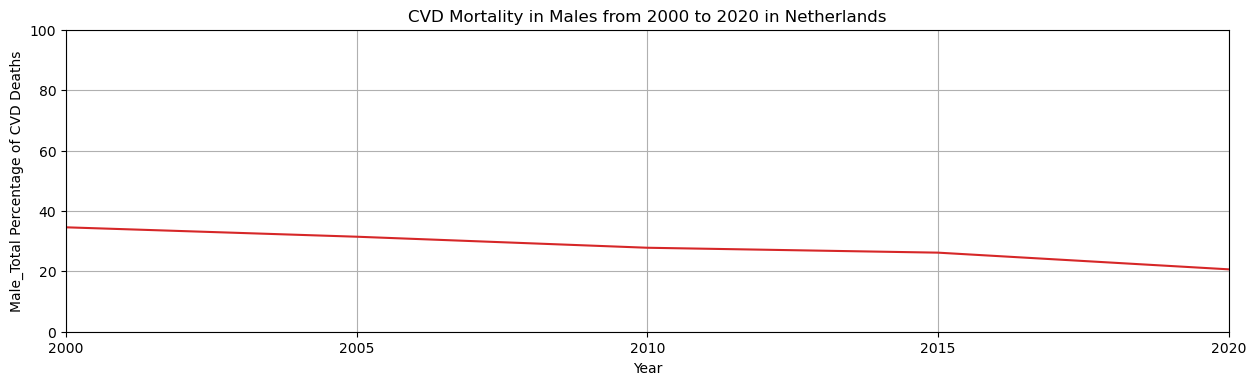

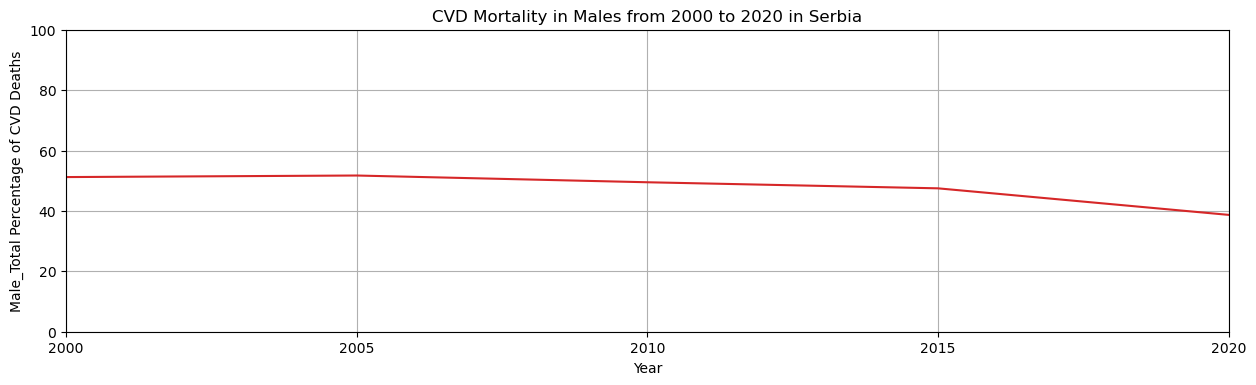

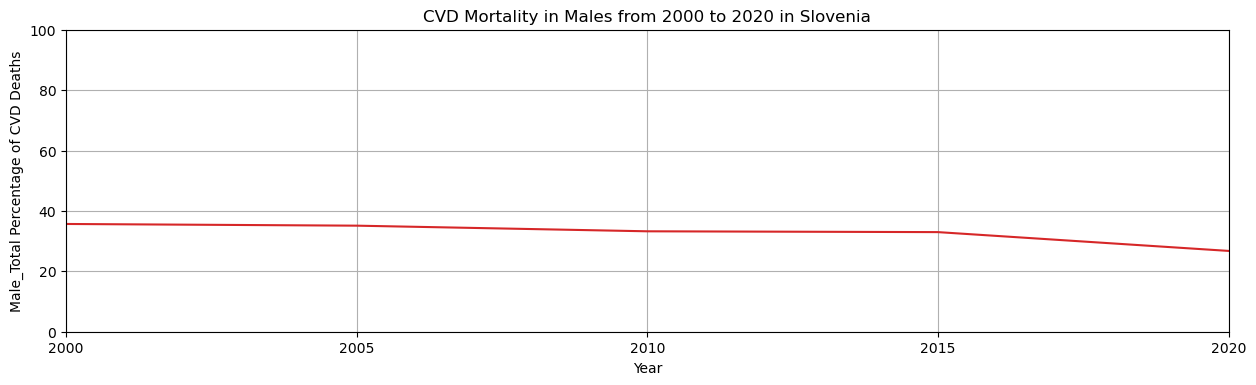

In [7]:
def plot_df(df, country, title="", xlabel='Year',
            ylabel='Male_Total Percentage of CVD Deaths', dpi=100):
    fig, ax = plt.subplots(figsize=(15, 4), dpi=dpi)
    ax.plot(df.loc[df['Country Name'] == country, 'Year'], df.loc[df['Country Name'] == country, 'Male_Total Percentage of CVD Deaths'], color='tab:red')
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)
    plt.show()
    
for country in df['Country Name'].unique():
    plot_df(df, country, title='CVD Mortality in Males from 2000 to 2020 in {}'.format(country))



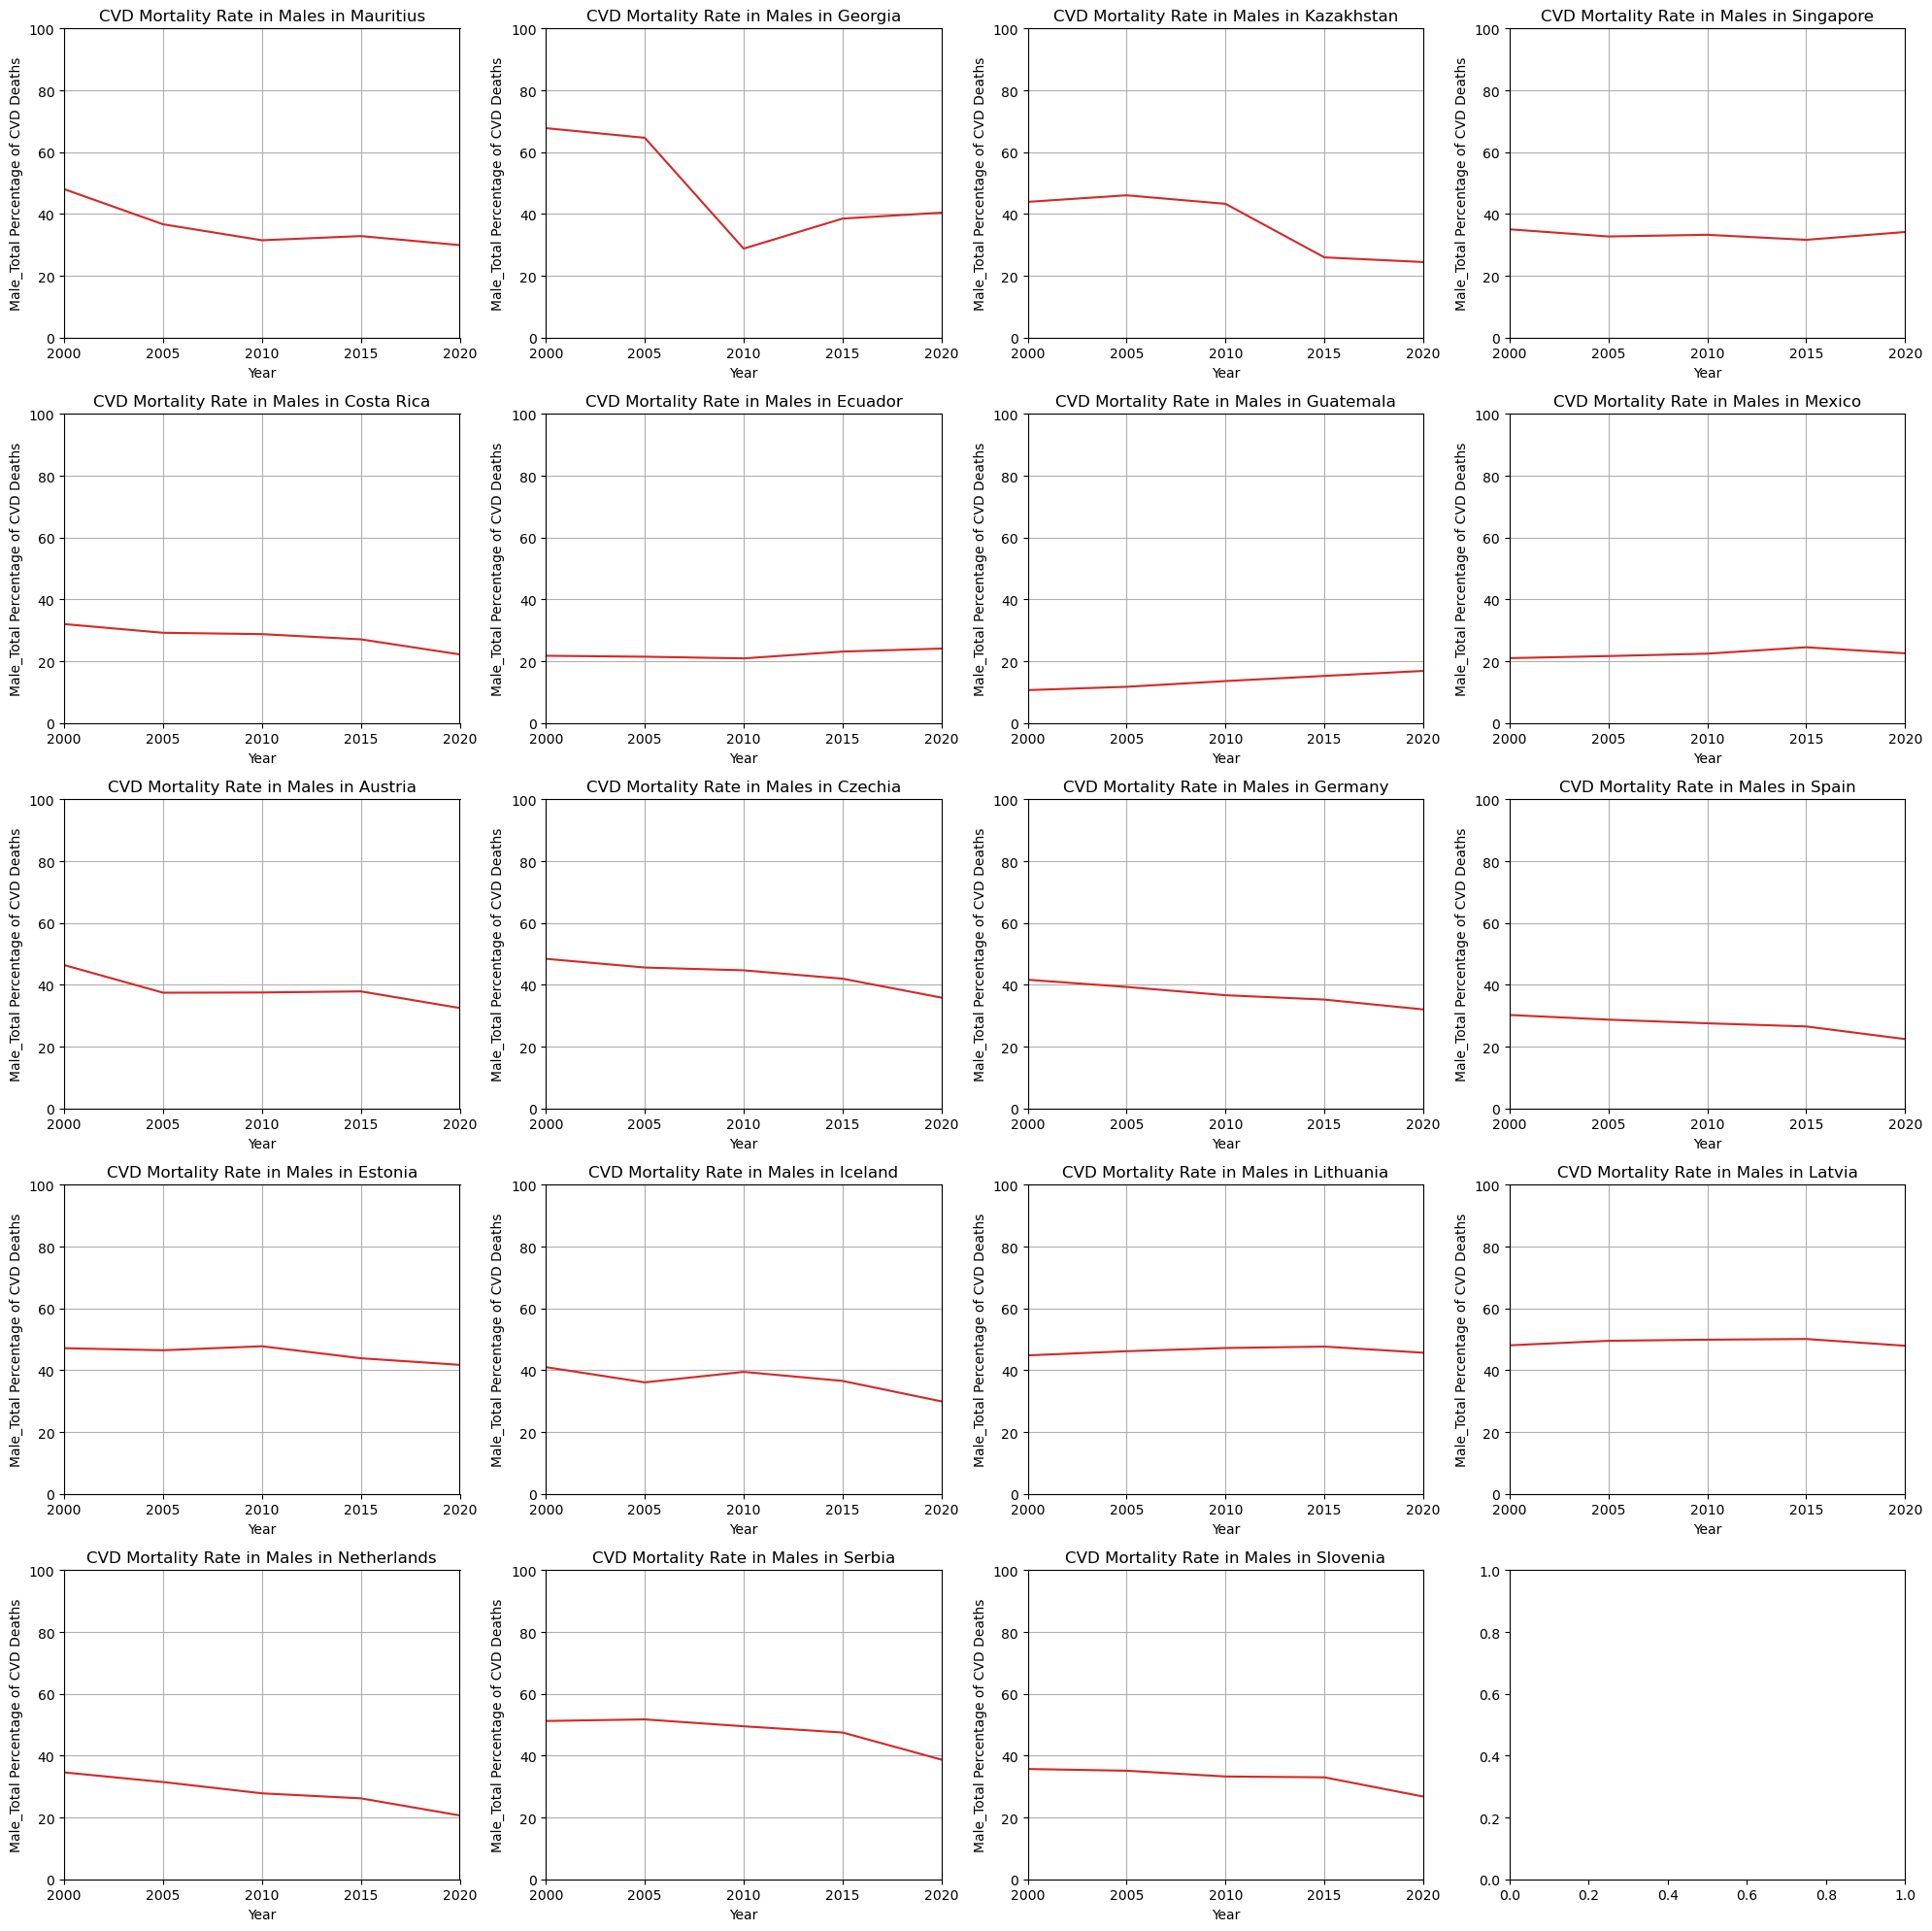

In [8]:
def plot_df(df, country, title="", xlabel='Year', ylabel='Male_Total Percentage of CVD Deaths', dpi=100):
    fig, ax = plt.subplots(figsize=(15, 4), dpi=dpi)
    ax.plot(df.loc[df['Country Name'] == country, 'Year'], df.loc[df['Country Name'] == country, 'Male_Total Percentage of CVD Deaths'], color='tab:red')
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)

countries = df['Country Name'].unique()

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20), dpi=100)

for i in range(len(countries)):
    row = i // 4
    col = i % 4
    country = countries[i]
    ax = axs[row][col]
    ax.plot(df.loc[df['Country Name'] == country, 'Year'], df.loc[df['Country Name'] == country, 'Male_Total Percentage of CVD Deaths'], color='tab:red')
    ax.set(title='CVD Mortality Rate in Males in {}'.format(country), xlabel='Year', ylabel='Male_Total Percentage of CVD Deaths')
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)
    #cause-specific mortality rate
plt.tight_layout()
plt.savefig('CVD Mortality Rate in Males.png')
plt.show()



# 1b. CVD Mortality in Females

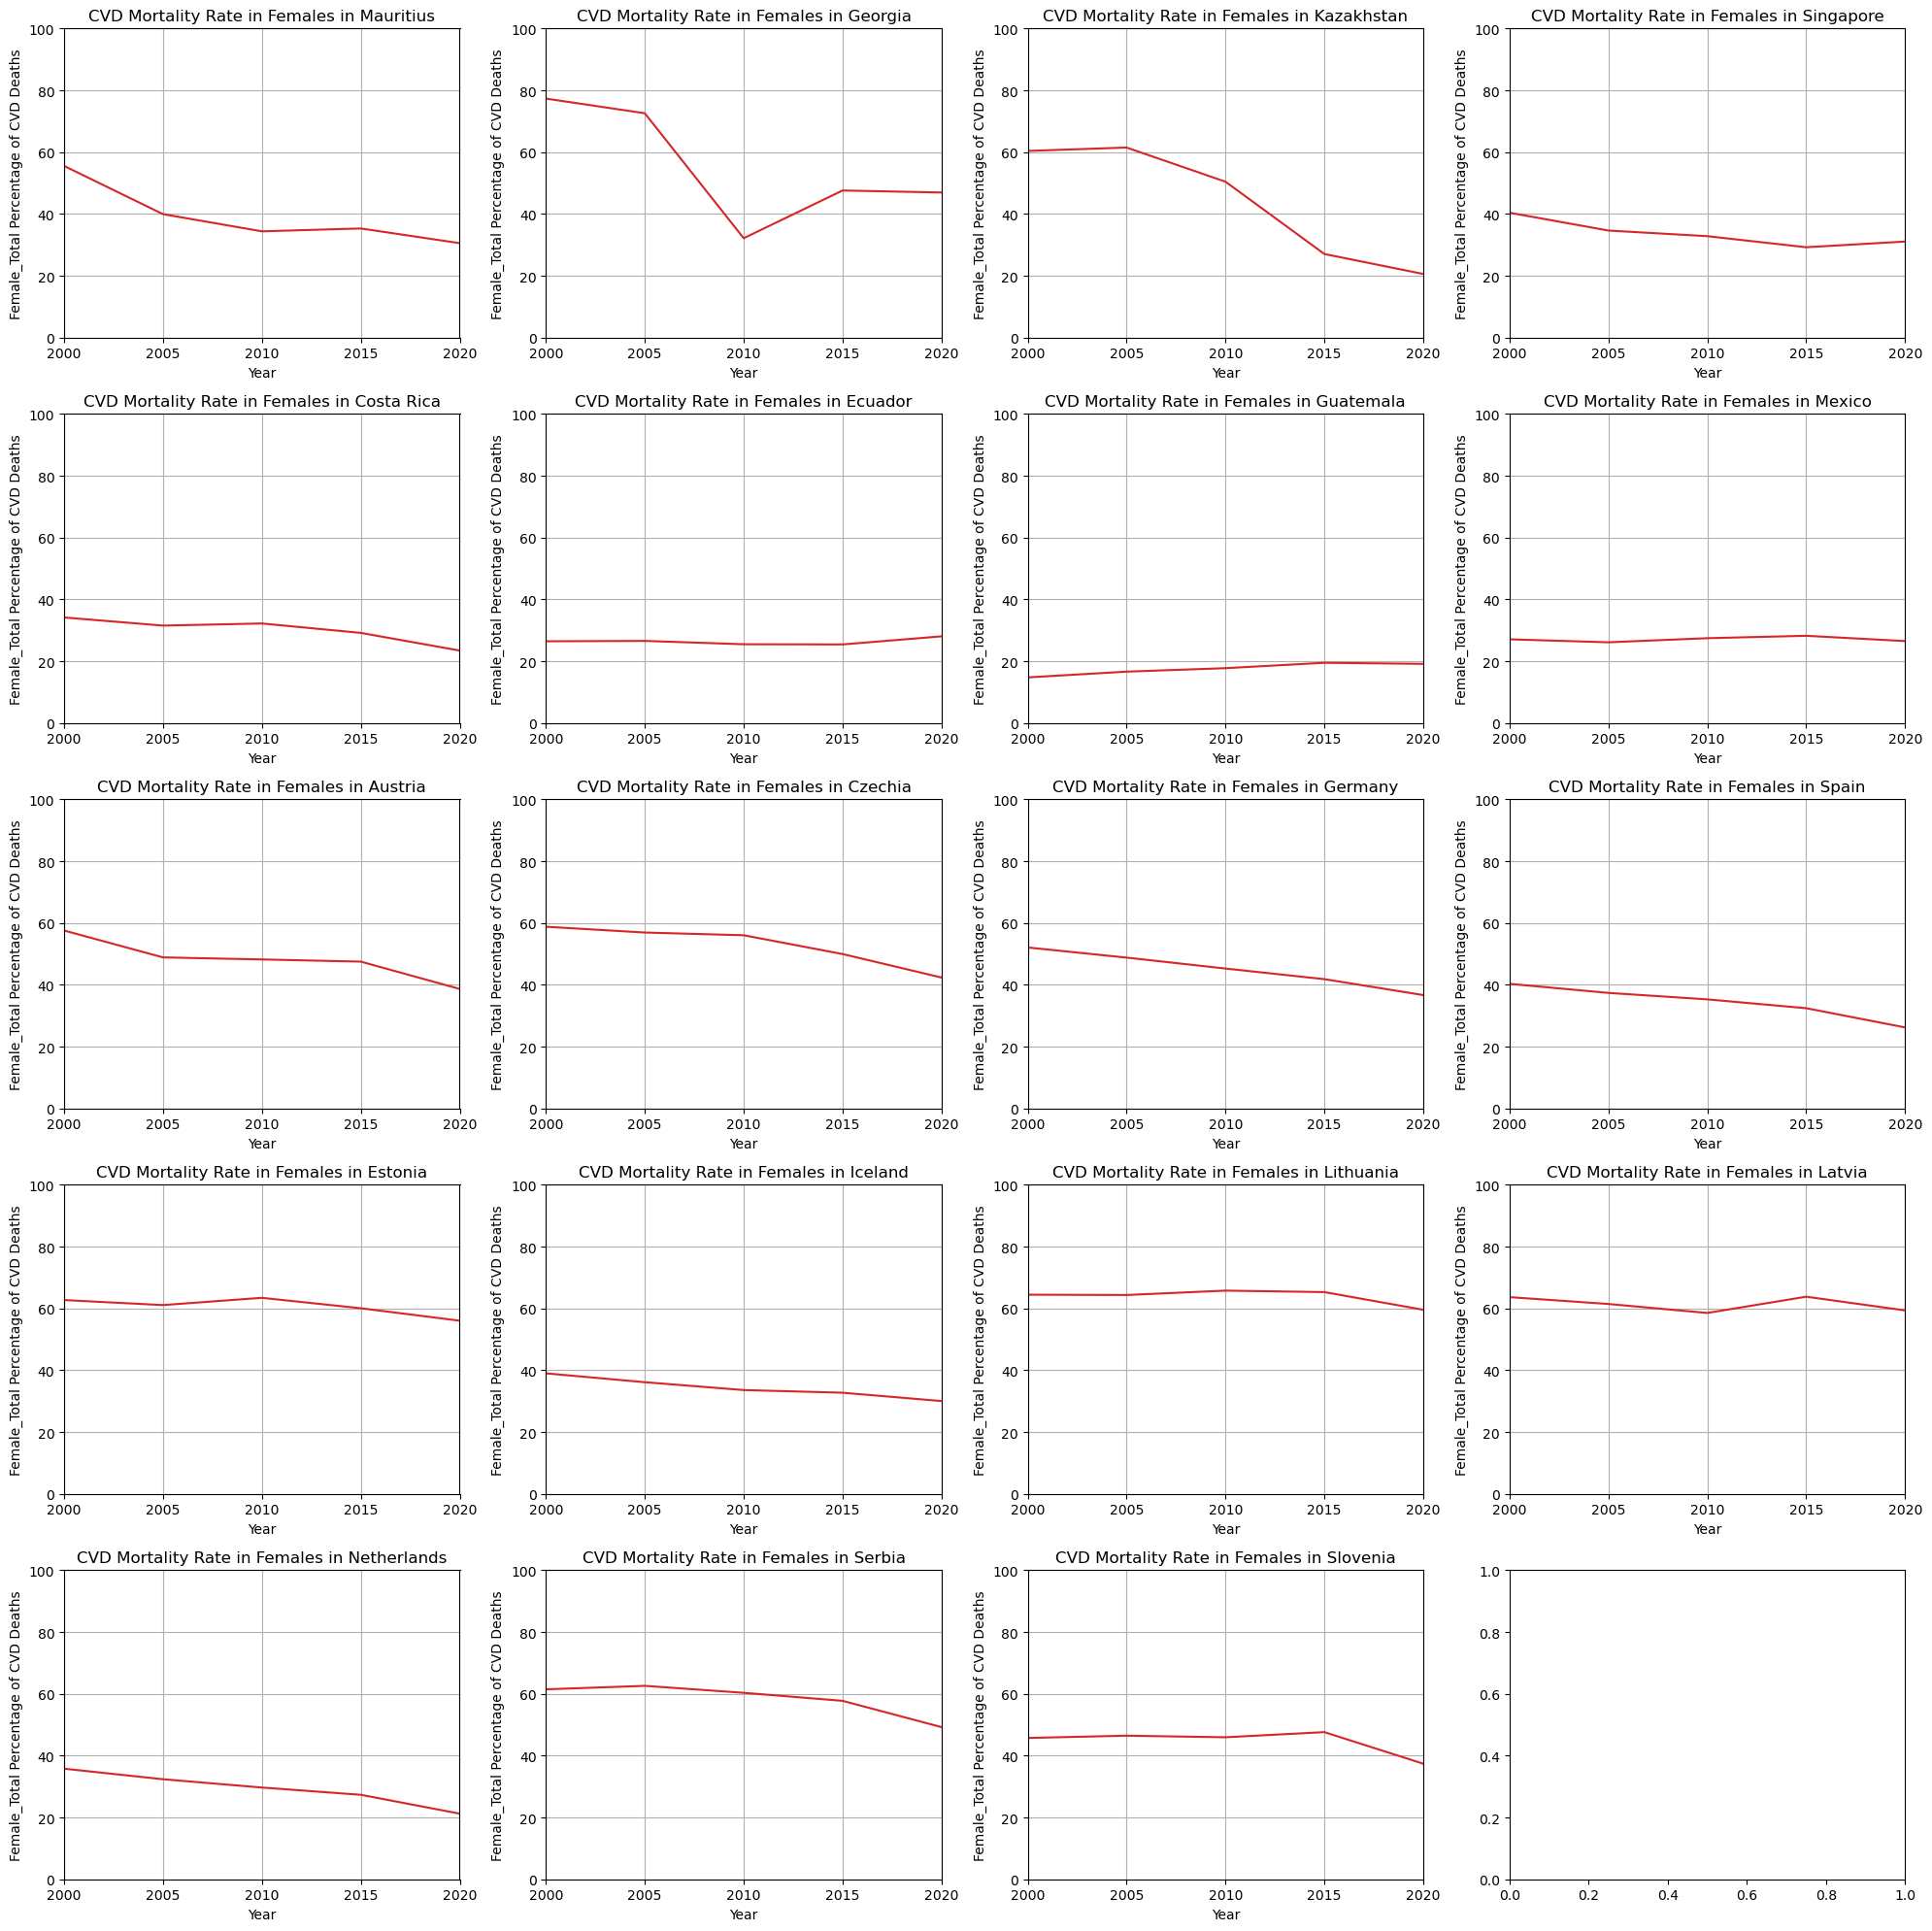

In [9]:
def plot_df(df, country, title="", xlabel='Year', ylabel='Female_Total Percentage of CVD Deaths', dpi=100):
    fig, ax = plt.subplots(figsize=(15, 4), dpi=dpi)
    ax.plot(df.loc[df['Country Name'] == country, 'Year'], df.loc[df['Country Name'] == country, 'Female_Total Percentage of CVD Deaths'], color='tab:red')
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)

countries = df['Country Name'].unique()

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20), dpi=100)

for i in range(len(countries)):
    row = i // 4
    col = i % 4
    country = countries[i]
    ax = axs[row][col]
    ax.plot(df.loc[df['Country Name'] == country, 'Year'], df.loc[df['Country Name'] == country, 'Female_Total Percentage of CVD Deaths'], color='tab:red')
    ax.set(title='CVD Mortality Rate in Females in {}'.format(country), xlabel='Year', ylabel='Female_Total Percentage of CVD Deaths')
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)
    #cause-specific mortality rate
plt.tight_layout()
plt.savefig('CVD Mortality Rate in Females.png')
plt.show()


# 1c. Estimate of Tobacco Use Prevalence (%)(age-standardized rate) in Males

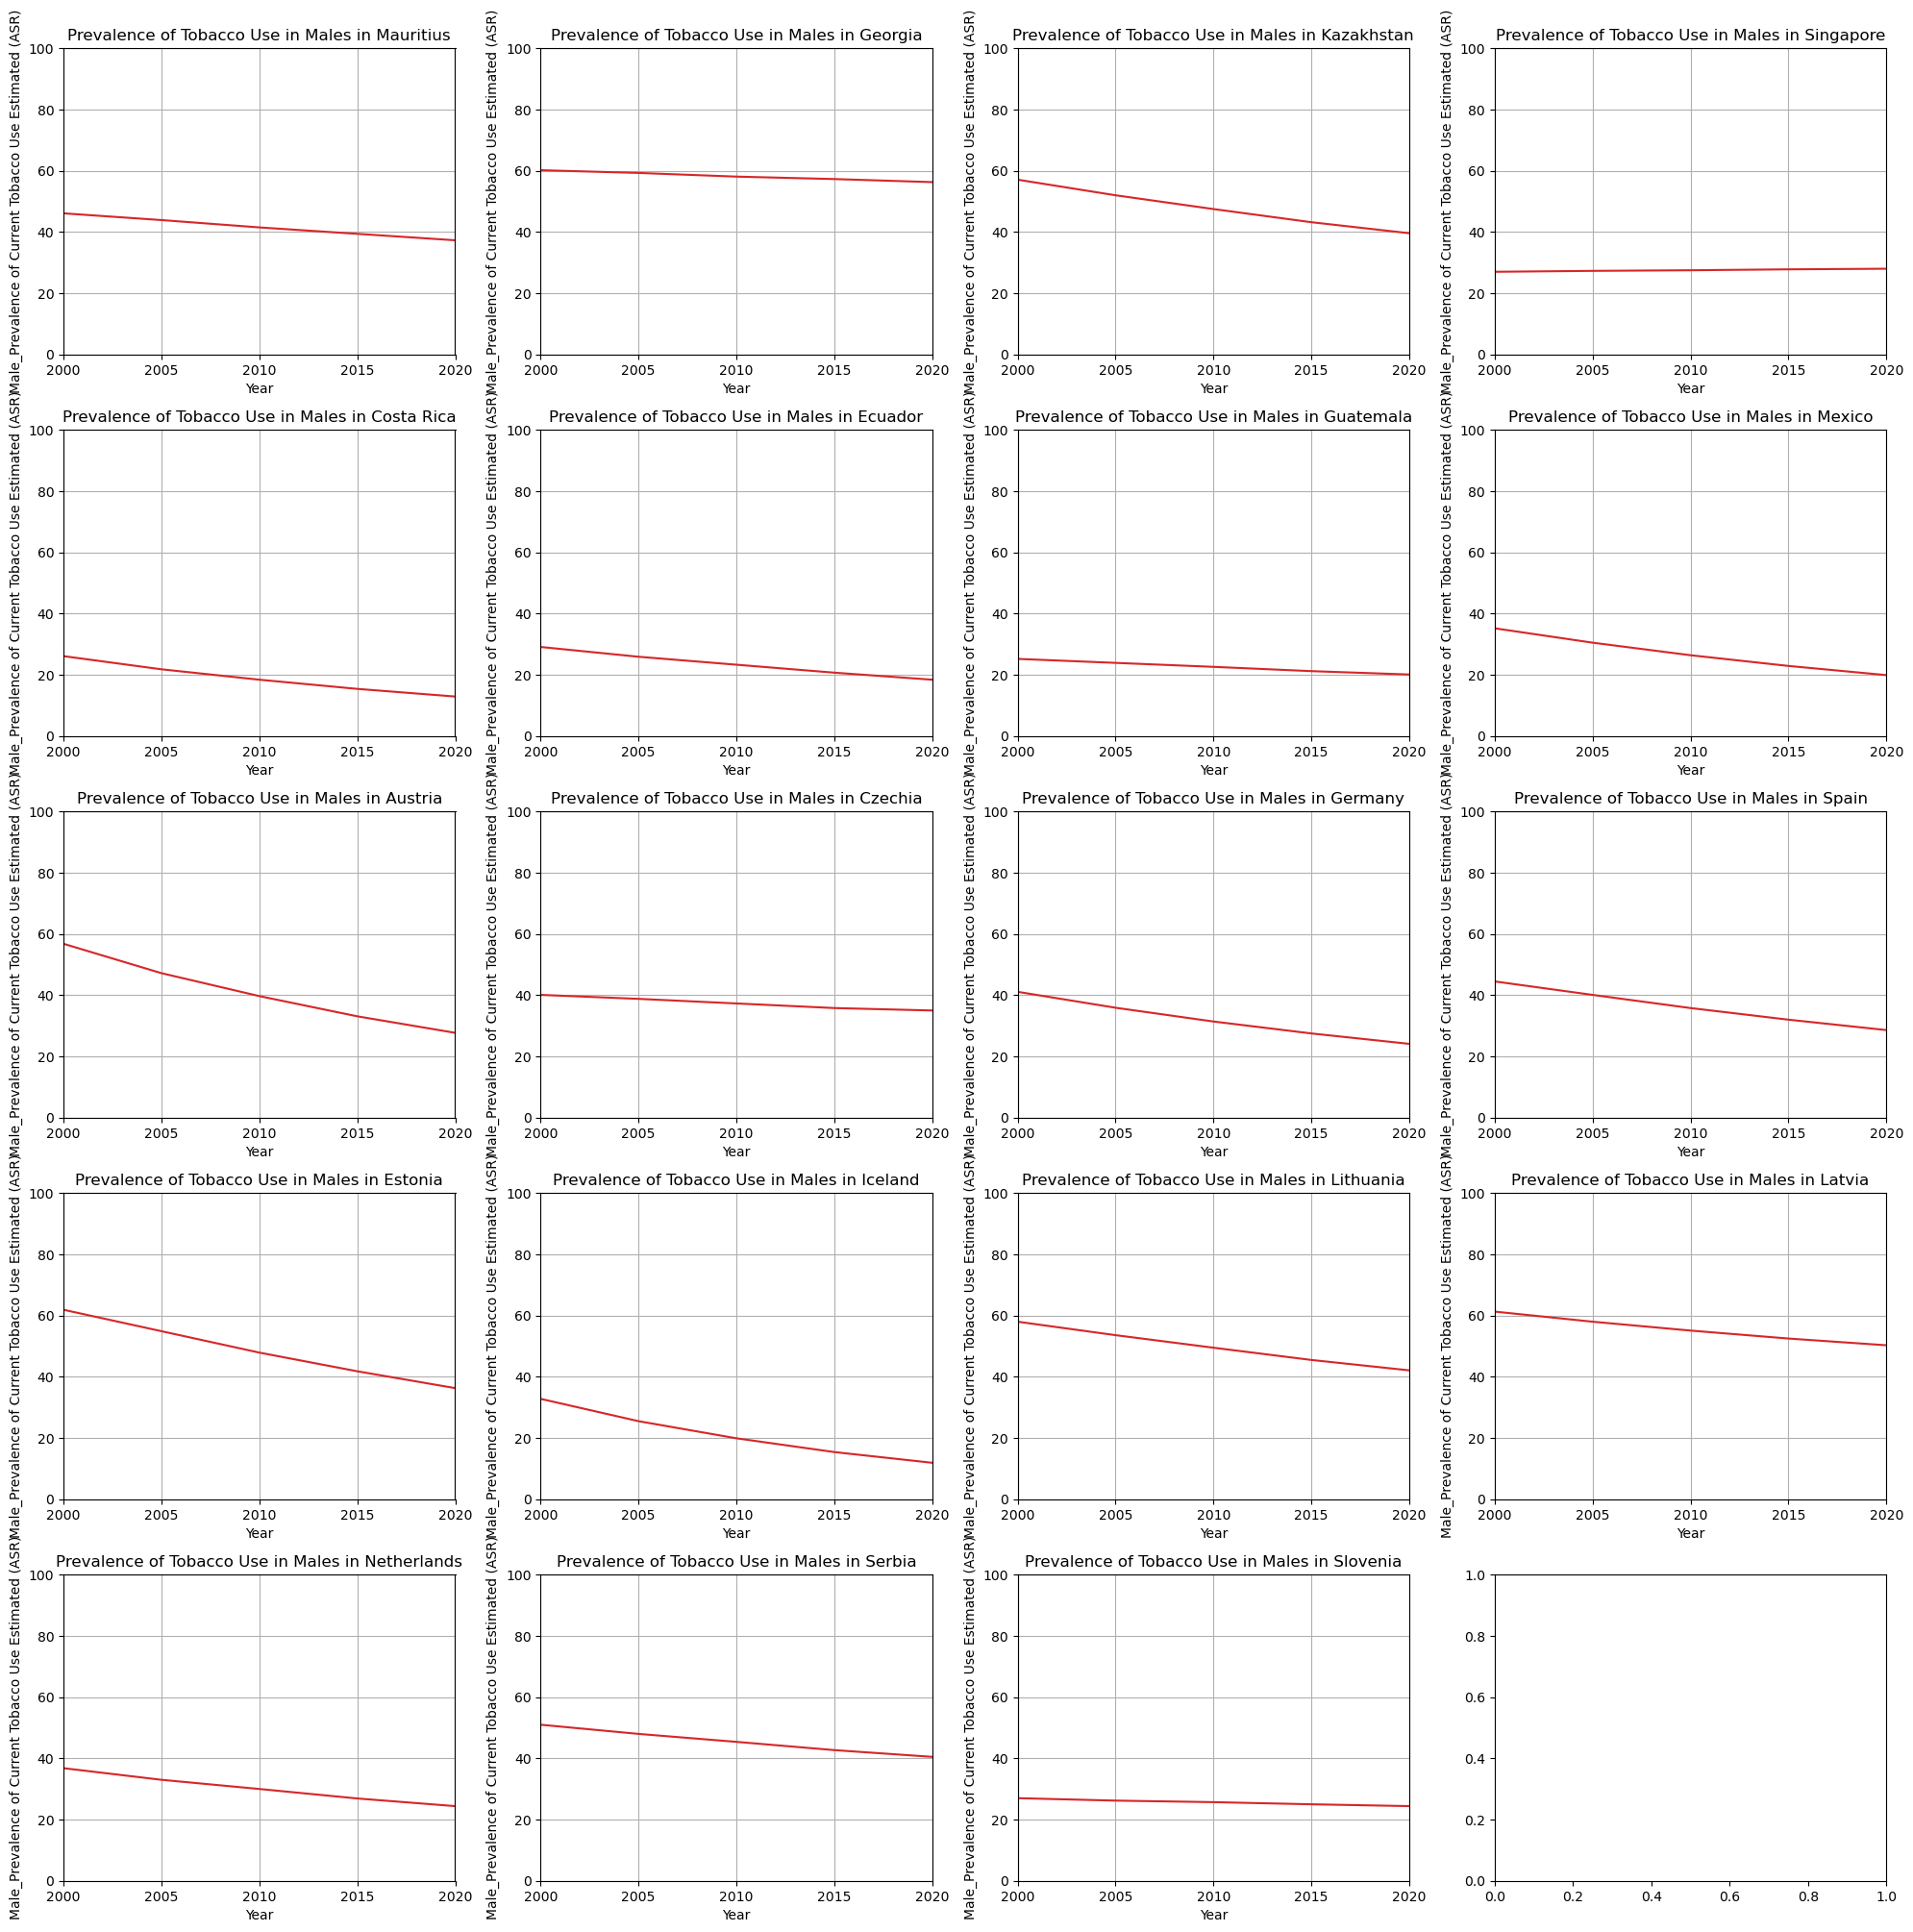

In [10]:
def plot_df(df, country, title="", xlabel='Year', 
            ylabel='Male_Prevalence of Current Tobacco Use Estimated (ASR)', dpi=100):
    fig, ax = plt.subplots(figsize=(15, 4), dpi=dpi)
    ax.plot(df.loc[df['Country Name'] == country, 'Year'],
            df.loc[df['Country Name'] == country, 'Male_Prevalence of Current Tobacco Use Estimated (ASR)'],
            color='tab:red')
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)

countries = df['Country Name'].unique()

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20), dpi=100)

for i in range(len(countries)):
    row = i // 4
    col = i % 4
    country = countries[i]
    ax = axs[row][col]
    ax.plot(df.loc[df['Country Name'] == country, 'Year'], df.loc[df['Country Name'] == country, 'Male_Prevalence of Current Tobacco Use Estimated (ASR)'], color='tab:red')
    ax.set(title='Prevalence of Tobacco Use in Males in {}'.format(country), xlabel='Year', ylabel='Male_Prevalence of Current Tobacco Use Estimated (ASR)')
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)
    #cause-specific mortality rate
plt.tight_layout()
plt.savefig('Prevalence of Tobacco Use in Males.png')
plt.show()


# 1d. Estimate of Tobacco Use Prevalence (%)(age-standardized rate) in Females

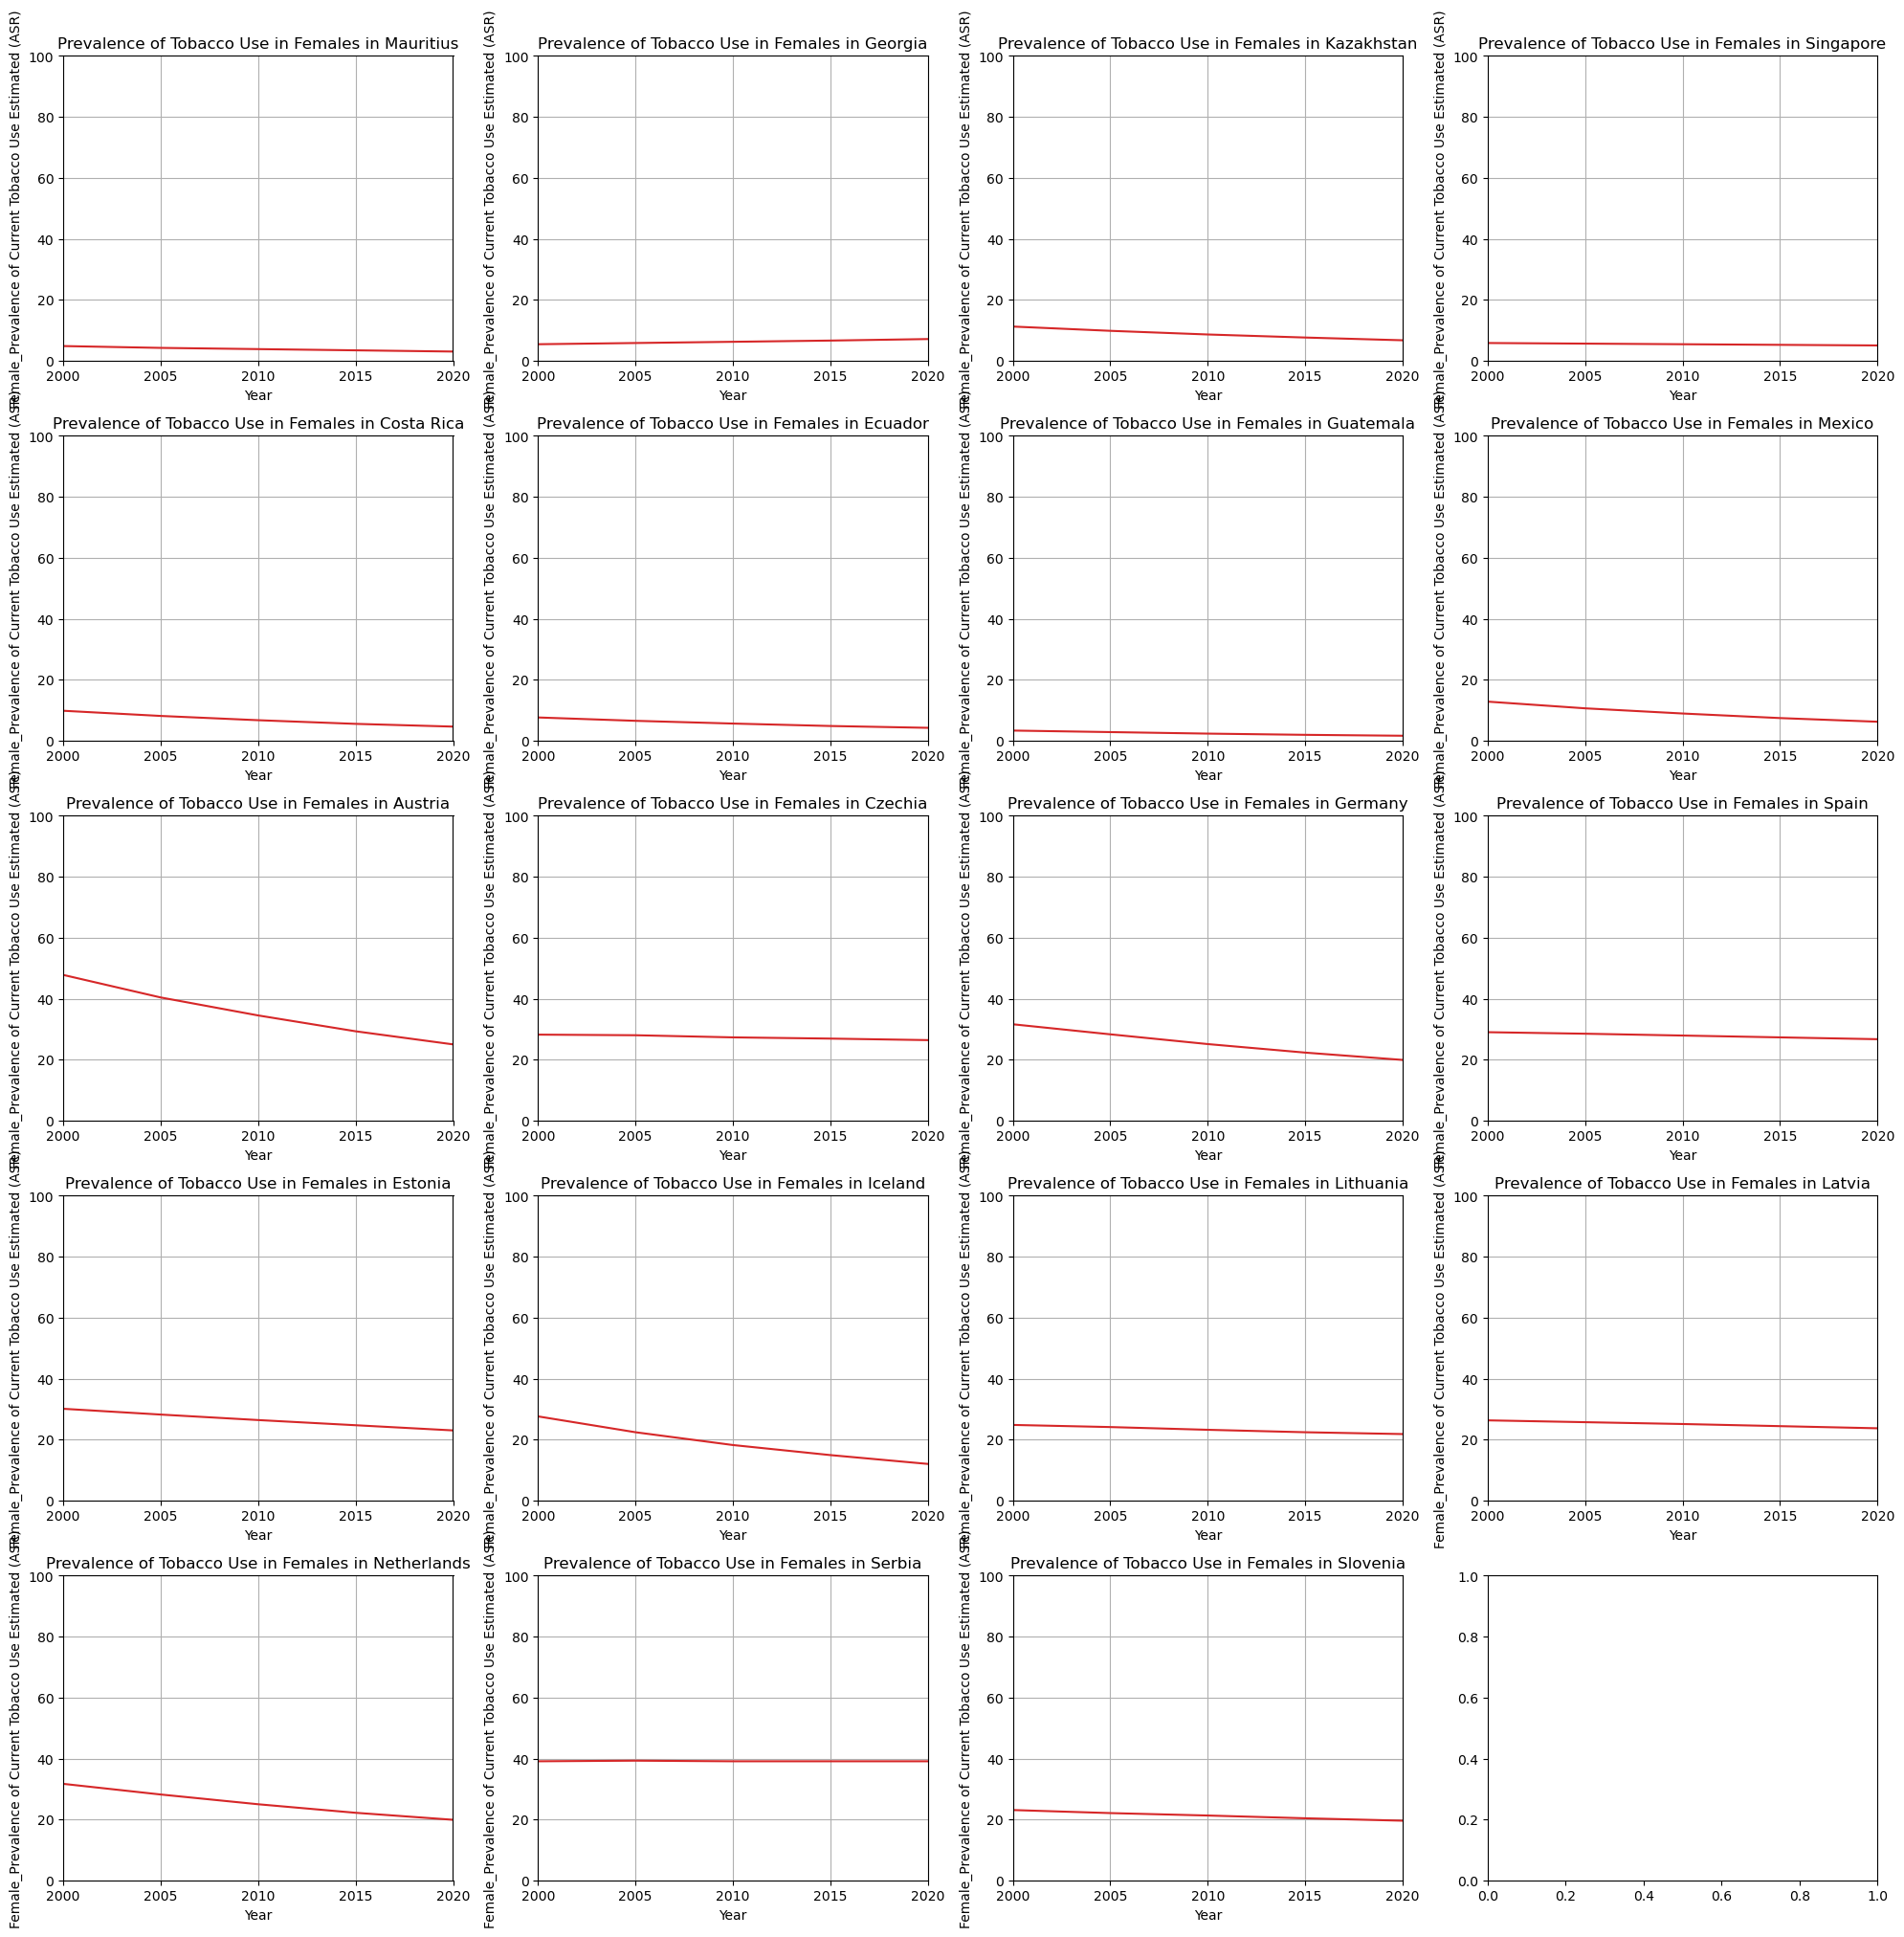

In [11]:
def plot_df(df, country, title="", xlabel='Year', 
            ylabel='Female_Prevalence of Current Tobacco Use Estimated (ASR)', dpi=100):
    fig, ax = plt.subplots(figsize=(15, 4), dpi=dpi)
    ax.plot(df.loc[df['Country Name'] == country, 'Year'],
            df.loc[df['Country Name'] == country, 'Female_Prevalence of Current Tobacco Use Estimated (ASR)'],
            color='tab:red')
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)

countries = df['Country Name'].unique()

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20), dpi=100)

for i in range(len(countries)):
    row = i // 4
    col = i % 4
    country = countries[i]
    ax = axs[row][col]
    ax.plot(df.loc[df['Country Name'] == country, 'Year'], df.loc[df['Country Name'] == country, 'Female_Prevalence of Current Tobacco Use Estimated (ASR)'], color='tab:red')
    ax.set(title='Prevalence of Tobacco Use in Females in {}'.format(country), xlabel='Year', ylabel='Female_Prevalence of Current Tobacco Use Estimated (ASR)')
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)
    #cause-specific mortality rate
plt.tight_layout()
plt.savefig('Prevalence of Tobacco Use in Females.png')
plt.show()


In [ ]:
#????
def two_side_view(df,country,title="",xlabel='Year',
            y1label='Male_Total Percentage of CVD Deaths'):
    x = df['Year'].values
    y1 = df['Male_Total Percentage of CVD Deaths'].values

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
    plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2,
                     color='seagreen')
    plt.ylim(-600, 600) #意義?
    plt.title('CVD Mortality in Males from 2000 to 2020 in {}'.format(country), fontsize=16)
    plt.hlines(y=0, xmin=np.min(df['Year']),
               xmax=np.max(df['Year']), linewidth=.5)
    plt.show()
    
for country in df['Country Name'].unique():
    two_side_view(df, country, title='CVD Mortality in Males from 2000 to 2020 in {}'.format(country))



# 2. Patterns in a Time Series

Any time series visualization may consist of the following components:
1. Base Level + Trend + Seasonality + Error.
2. However, It is not mandatory that all time series must have a trend and/or seasonality. 
3. A time series may not have a distinct trend but have a seasonality and vice-versa.

In [ ]:
def plot_df(df, country, title="", xlabel='Year',
            ylabel='Male_Total Percentage of CVD Deaths', dpi=100):
    fig, ax = plt.subplots(figsize=(15, 4), dpi=dpi)
    ax.plot(df.loc[df['Country Name'] == country, 'Year'], df.loc[df['Country Name'] == country, 'Male_Total Percentage of CVD Deaths'], color='tab:red')
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.set_ylim([0, 100])
    ax.set_xlim([min(df['Year']), max(df['Year'])])
    ax.set_xticks(df['Year'].unique())
    ax.grid(True)
    plt.show()
    
for country in df['Country Name'].unique():
    plot_df(df, country, title='Trend and Seasonality in CVD Mortality in Males from 2000 to 2020 in {}'.format(country))


# Cyclic behaviour, not Seasonality
If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically 
# influenced by the business and other socio-economic factors.

#  3. Decomposition of a Time Series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
for country in df['Country Name'].unique():
    # filter data by city
    country_data = df[df['Country Name']==country]
    
    # Multiplicative Decomposition 
    multiplicative_decomposition = seasonal_decompose(country_data['Male_Total Percentage of CVD Deaths'], 
                                                      model='multiplicative', period=30)

    # plot decomposition for each city
    plt.rcParams.update({'figure.figsize': (16,12)})
    multiplicative_decomposition.plot().suptitle(f'{country} Multiplicative Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [ ]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Male_Total Percentage of CVD Deaths'], model='multiplicative', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
for country in df['Country Name'].unique():
    # filter data by city
    country_data = df[df['Country Name']==country]
    
    # Multiplicative Decomposition 
    additive_decomposition = seasonal_decompose(country_data['Male_Total Percentage of CVD Deaths'], 
                                                      model='additive', period=30)

    # plot decomposition for each city
    plt.rcParams.update({'figure.figsize': (16,12)})
    additive_decomposition.plot().suptitle(f'{country} Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [ ]:
# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Male_Total Percentage of CVD Deaths'], model='additive', period=30)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 4.Stationary and Non-Stationary Time Series
The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.
These transformation may include:
1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above

why we want to convert a non-stationary series into a stationary one?
1. Forecasting a stationary series is relatively easy and the forecasts are more reliable.
2. autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.
3. We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.


# 5. Test for Stationarity 
1. by looking at the plot of the series.
2. to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.
Unit Root tests:
1. Augmented Dickey Fuller test (ADF Test)

2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

3. Philips Perron test (PP Test)

In [ ]:
# ADF test
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [ ]:
series = df.loc[:, 'Male_Total Percentage of CVD Deaths'].values
df.plot(figsize=(14,8), legend=None, title='CVD Mortality in Males from 2000 to 2020')

The p-value <0.05 and the ADF statistic is lower than any of the critical values.

Clearly, reject the null hypothesis, the time series is in fact
stationary.

In [ ]:
# ADF Test
import sys

# Open a file for writing
with open('ADF_test.txt', 'w') as f:
    # Redirect the standard output to the file
    sys.stdout = f

    # Loop over each country in the dataframe
    for country in df['Country Name'].unique():
        # Subset the data for the current country
        country_data = df[df['Country Name'] == country]['Male_Total Percentage of CVD Deaths']
        # Perform the ADF test
        result = adfuller(country_data, autolag='AIC')
        # Print the results to the console
        print(f'Country Name: {country}')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'n_lags: {result[2]}')
        for key, value in result[4].items():
            print(f'Critical Values: {key}, {value}')

    # Reset the standard output
    sys.stdout = sys.__stdout__


The p >0.05,significance level -> 
the ADF statistic is higher than any of the critical values ->  
there is no reason to reject the null hypothesis -> 
the time series is non-stationary.
# Only Mauritius and Singapore are stationary. The rest of all are non-stationary.

# 6.Detrend a Time Series

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal

for country in df['Country Name'].unique():
    country_data = df[df['Country Name'] == country]['Male_Total Percentage of CVD Deaths'].values
    detrended = signal.detrend(country_data)
    plt.figure()
    plt.plot(detrended)
    plt.title(f'CVD Mortality in Males_detrend ({country})', fontsize=16)
    plt.show()


In [ ]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['Male_Total Percentage of CVD Deaths'], model='multiplicative', period=30)
detrended = df['Male_Total Percentage of CVD Deaths'].values - result_mul.trend
plt.plot(detrended)
plt.title('CVD Mortality in Males_detrend', fontsize=16)

"""
If I run loop in each country:
ValueError: x must have 2 complete cycles requires 60 observations. x only has 5 observation(s)

for country in df['Country Name'].unique():
    country_data = df[df['Country Name'] == country]['Male_Total Percentage of CVD Deaths'].values
    result_mul = seasonal_decompose(country_data, model='multiplicative', period=30)
    detrended = country_data - result_mul.trend
    plt.figure()
    plt.plot(detrended)
    plt.title(f'CVD Mortality in Males_detrend ({country})', fontsize=16)
    plt.show()

"""

# 7. Deseasonalize a Time Series 

In [ ]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Male_Total Percentage of CVD Deaths'], model='multiplicative', period=30)

# Deseasonalize
deseasonalized = df['Male_Total Percentage of CVD Deaths'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('CVD Mortality in Males', fontsize=16)
plt.plot()


"""
If I run loop in each country:
ValueError: x must have 2 complete cycles requires 60 observations. x only has 5 observation(s)
for country in df['Country Name'].unique():
    country_data = df[df['Country Name'] == country]['Male_Total Percentage of CVD Deaths'].values
    
result_mul = seasonal_decompose(country_data, model='multiplicative', period=30)

# Deseasonalize
deseasonalized = dcountry_data / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('CVD Mortality in Males', fontsize=16)
plt.plot()
"""

# 8. How to test for seasonality of a time series? 
1. to plot the series and check for repeatable patterns in fixed time intervals
2. use the Autocorrelation Function (ACF) plot. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

In [ ]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot for each city
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
for city, group in df.groupby('Country Name'):
    autocorrelation_plot(group['Male_Total Percentage of CVD Deaths'].tolist())
    plt.title(city)
    plt.show()


# 8a. Autocorrelation_CVD Mortality in Males

In [ ]:
from pandas.plotting import autocorrelation_plot

# Create a 5x4 grid of subplots
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axs = axs.ravel() # flatten the subplot array

# Draw plot for each city
for i, (city, group) in enumerate(df.groupby('Country Name')):
    autocorrelation_plot(group['Male_Total Percentage of CVD Deaths'].tolist(), ax=axs[i])
    axs[i].set_title(f'CVD Mortality in Males in {city}', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('Autocorrelation_CVD Mortality in Males.png')


# 8b. Autocorrelation_CVD Mortality in Females

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axs = axs.ravel() # flatten the subplot array

# Draw plot for each city
for i, (city, group) in enumerate(df.groupby('Country Name')):
    autocorrelation_plot(group['Female_Total Percentage of CVD Deaths'].tolist(), ax=axs[i])
    axs[i].set_title(f'CVD Mortality in Females in {city}', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('Autocorrelation_CVD Mortality in Females.png')

# 8c. Estimate of Tobacco Use Prevalence (%)(age-standardized rate) in Males

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axs = axs.ravel() # flatten the subplot array

# Draw plot for each city
for i, (city, group) in enumerate(df.groupby('Country Name')):
    autocorrelation_plot(group['Male_Prevalence of Current Tobacco Use Estimated (ASR)'].tolist(), ax=axs[i])
    axs[i].set_title(f'Prevalence of Tobacco Use in Males in {city}', fontsize=14.5)

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('Autocorrelation_Tobacco use in Males.png')

# 8d. Estimate of Tobacco Use Prevalence (%)(age-standardized rate) in Females

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axs = axs.ravel() # flatten the subplot array

# Draw plot for each city
for i, (city, group) in enumerate(df.groupby('Country Name')):
    autocorrelation_plot(group['Female_Prevalence of Current Tobacco Use Estimated (ASR)'].tolist(), ax=axs[i])
    axs[i].set_title(f'Prevalence of Tobacco Use in Females in {city}', fontsize=14.5)

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('Autocorrelation_Tobacco use in Females.png')

# Autocorrelation and Partial Autocorrelation Functions 

1. Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.
2. Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
groups = df.groupby('Country Name')

# 對每個組執行代碼
for name, group in groups:
    fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
    plot_acf(group['Male_Total Percentage of CVD Deaths'].tolist(), lags=4, ax=axes[0])
    plot_pacf(group['Male_Total Percentage of CVD Deaths'].tolist(), lags=1, ax=axes[1])
    plt.title(name)
    plt.show()
    
# or use it: plot_pacf(group['Male_Total Percentage of CVD Deaths'].tolist(), lags=1,method='ywm', ax=axes[1])

# Computation of Partial Autocorrelation Function
The partial autocorrelation function of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.
The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors. 
??

# Lag Plots 
A Lag plot is a scatter plot of a time series against a lag of itself. 
It is normally used to check for autocorrelation. 
If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

cities = df['Country Name'].unique()
for city in cities:
    city_data = df[df['Country Name'] == city]
    fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
    for i, ax in enumerate(axes.flatten()[:4]):
        lag_plot(city_data['Male_Total Percentage of CVD Deaths'], lag=i+1, ax=ax, c='firebrick')
        ax.set_title('Lag ' + str(i+1))
    fig.suptitle('Lag Plots of CVD Mortality in males in ' + city, y=1.05)
    plt.show()


# Granger Causality Test 
to determine if one time series will be useful to forecast another.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

df['Year'] = pd.to_datetime(df['Year'])
data = df[['Male_Total Percentage of CVD Deaths']]  # exclude 'Year' column
grangercausalitytests(data, maxlag=2)


In [ ]:
cities = df['Country Name'].unique()  # 取得19個城市的名稱
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))  # 創建一個5x4的子圖

for city, ax in zip(cities, axes.flatten()):
    data = df[df['Country Name']==city]
    ax.plot(data['Year'], data['Male_Total Percentage of CVD Deaths'])
    ax.set_title(city)
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    
plt.suptitle('CVD Mortality in Males from 2000 to 2020', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
cities = df['Country Name'].unique()  # 取得19個城市的名稱
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))  # 創建一個5x4的子圖

for city, ax in zip(cities, axes.flatten()):
    data = df[df['Country Name']==city]
    ax.plot(data['Year'], data['Female_Total Percentage of CVD Deaths'])
    ax.set_title(city)
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    
plt.suptitle('CVD Mortality in females from 2000 to 2020', fontsize=20)
plt.tight_layout()
plt.show()